In [1]:
def print_2(*a):
    a1,a2 = a
    print(f'a1:{a1},a2:{a2}')

def print_2_new(a1,a2):
    print(f'a1:{a1},a2:{a2}')
    
def print_1(a1):
    print(f"a1:{a1}")
    
def print_none():
    print("I got nothing!")

In [2]:
print_2(1,2)

a1:1,a2:2


In [3]:
print_2_new(1,2)

a1:1,a2:2


In [4]:
print_1(1)

a1:1


In [5]:
print_none()

I got nothing!


In [6]:
def print_2_2(a):
    a1,a2 = a
    print(f'a1:{a1},a2:{a2}')

In [8]:
print_2_2([1,2])

a1:1,a2:2


In [9]:
print_2_2(1,2)

TypeError: print_2_2() takes 1 positional argument but 2 were given

In [10]:
def che_and_cra(cheese_count, boxes_of_crackers):
    print(f'You have {cheese_count} cheeses!')
    print(f'You have {boxes_of_crackers} boxes of crackers!')
    
che_and_cra(20,30)

You have 20 cheeses!
You have 30 boxes of crackers!


In [11]:
a = 10
b = 20
che_and_cra(a,b)

You have 10 cheeses!
You have 20 boxes of crackers!


In [12]:
che_and_cra(a+20,b+30)

You have 30 cheeses!
You have 50 boxes of crackers!


In [17]:
filename = 'Sample.txt'
target = open(filename, 'w')
line1 = input("line 1 :")
line2 = input("line 2 :")
line3 = input("line 3 :")
target.write(line1)
target.write('\n')
target.write(line2)
target.write('\n')
target.write(line3)
target.write('\n')
target.close()

In [18]:
text = open(filename)

In [19]:
text.read()

'1\n2\n3\n'

In [32]:
def print_all(f):
    print(f.read())
    
def rewind(f):
    print(f.seek(0))
    
def print_a_line(line_count,f):
    print(line_count,f.readline())

In [38]:
current_file = open(filename)

In [34]:
print_all(current_file)

1
2
3



In [35]:
rewind(current_file)

0


In [39]:
print_a_line(1,current_file)
print_a_line(2,current_file)
print_a_line(3,current_file)

1 1

2 2

3 3



In [40]:
current_file.close()

In [43]:
def add(a,b):
    print(a+b)
    return a+b

age = add(1,2)
print(age)

3
3


In [45]:
a = input("a:")
b = input("b:")
c = input('c:')
if a < b:
    print("a<b")
elif a == b:
    print('a=b')
else:
    print("a>b")

a>b


In [48]:
'b' == 'a'

False

In [49]:
'a' == 'a'

True

In [50]:
1 == "a"

False

In [52]:
n = 100
sum = 0
flag = 1
while flag:
    sum = sum + n
    n -= 1
    if n == 0:
        flag = 0

print(f'sum = {sum}')

sum = 5050


In [53]:
for i in range(6):
    print(i)

0
1
2
3
4
5


In [56]:
number_file = open('numbers.txt','w')

In [61]:
number_file.write('1')

1

In [63]:
number_file.close()

In [64]:
file = open("numbers.txt")

In [65]:
file.read()

'1'

In [99]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
import matplotlib.pyplot as plt

In [100]:
def data_pre(data,label):
    a = np.loadtxt(data)
    b = a[0:144000]
    c = b.reshape(240,600)
    np.random.shuffle(c)
    train = c[:200,:]
    test = c[200:,:]
    label_train = np.array([label for i in range(0,200)])
    label_test = np.array([label for i in range(0,40)])
    return train, test, label_train, label_test

In [101]:
def stackkk(a,b,c,d,e,f,g,h):
    aa = np.vstack((a,e))
    bb = np.vstack((b,f))
    cc = np.hstack((c,g))
    dd = np.hstack((d,h))
    return aa, bb, cc, dd

In [102]:
x_tra0, x_tes0, y_tra0, y_tes0 = data_pre('n.txt',0)
x_tra1, x_tes1, y_tra1, y_tes1 = data_pre('b.txt',1)
x_tra2, x_tes2, y_tra2, y_tes2 = data_pre('i.txt',2)
x_tra3, x_tes3, y_tra3, y_tes3 = data_pre('o.txt',3)
x_tra4, x_tes4, y_tra4, y_tes4 = data_pre('h.txt',4)

In [119]:
tr1, te1, yr1, ye1 = stackkk(x_tra0, x_tes0, y_tra0, y_tes0, x_tra1, x_tes1, y_tra1, y_tes1)
tr2, te2, yr2, ye2 = stackkk(tr1, te1, yr1, ye1, x_tra2, x_tes2, y_tra2, y_tes2)
tr3, te3, yr3, ye3 = stackkk(tr2, te2, yr2, ye2, x_tra3, x_tes3, y_tra3, y_tes3)
tr4, te4, yr4, ye4 = stackkk(tr3, te3, yr3, ye3, x_tra4, x_tes4, y_tra4, y_tes4)
data_train = tr4.reshape(1000,600,1)
data_test = te4.reshape(200,600,1)
labe1_train = yr4
label_test = ye4

In [120]:
state = np.random.get_state()
np.random.shuffle(data_train)
np.random.set_state(state)
np.random.shuffle(labe1_train)

In [121]:
def to_one_hot(labels, dimension = 5):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

In [122]:
one_hot_train_label = to_one_hot(labe1_train)
one_hot_test_label = to_one_hot(label_test)

In [125]:
model = Sequential()
model.add(Conv1D(filters = 16,
                kernel_size = 25,
                padding = 'same',
                input_shape = (600,1),
                activation = 'relu'))
model.add(MaxPooling1D(pool_size = 4))
model.add(Conv1D(filters = 10,
                kernel_size = 25,
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling1D(pool_size = 4))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation = 'softmax'))
print(model.summary)
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics = ['accuracy'])
train_history=model.fit(x = data_train, y = one_hot_train_label,
                        validation_split=0.3,
                        epochs=30,batch_size=20,verbose=2)

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x0000012D5E61C048>>
Train on 700 samples, validate on 300 samples
Epoch 1/30
 - 1s - loss: 13.0155 - accuracy: 0.1843 - val_loss: 12.9094 - val_accuracy: 0.1967
Epoch 2/30
 - 0s - loss: 12.7185 - accuracy: 0.2043 - val_loss: 12.8945 - val_accuracy: 0.2000
Epoch 3/30
 - 0s - loss: 13.0186 - accuracy: 0.1829 - val_loss: 12.8945 - val_accuracy: 0.2000
Epoch 4/30
 - 0s - loss: 12.9994 - accuracy: 0.1900 - val_loss: 12.8945 - val_accuracy: 0.2000
Epoch 5/30
 - 0s - loss: 12.7341 - accuracy: 0.2071 - val_loss: 12.8945 - val_accuracy: 0.2000
Epoch 6/30
 - 0s - loss: 12.7222 - accuracy: 0.2071 - val_loss: 12.6258 - val_accuracy: 0.2167
Epoch 7/30
 - 0s - loss: 13.0096 - accuracy: 0.1929 - val_loss: 12.6258 - val_accuracy: 0.2167
Epoch 8/30
 - 0s - loss: 12.9866 - accuracy: 0.1943 - val_loss: 12.6258 - val_accuracy: 0.2167
Epoch 9/30
 - 0s - loss: 13.0096 - accuracy: 0.1929 - val_loss: 12.6258 - val_accuracy: 0.2167

In [126]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()

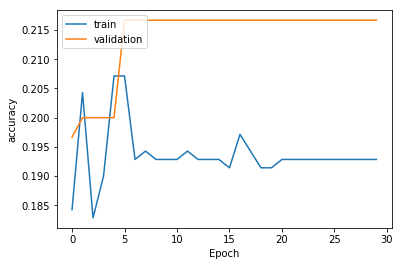

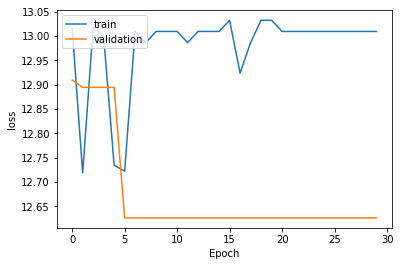

In [130]:
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import Axes3D
import math
x = [0,0.8,1,1.8,2,2.8,3.3,3.8,4.3,5]
yx = [0,1,0.8,1.8,1.6,2.6,1.8,1.4,1,0.4]
xx = np.linspace(0,5,1000)
gx = np.exp(-0.02*xx**2)
print("gx len",len(gx))
f = interp1d(x, yx,kind="cubic")
ynew=f(xx)
print("ynew len",len(ynew))
hx = np.zeros((1000,1000))
print(hx.shape)
for i in range(999):
     hx[i+1,:math.floor(ynew[i+1]/0.05)]=gx[i+1]

plt.plot(x,yx)
plt.plot(xx,gx)
plt.plot(xx,ynew)
plt.show()
fig1 = plt.figure()
plt.title('3d')
ax1 = Axes3D(fig1)
x,y = np.meshgrid(xx,xx)
ax1.plot_surface(x, y, hx, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

gx len 1000
ynew len 1000
(1000, 1000)


<Figure size 640x480 with 1 Axes>

[ 1  2  3  4  5  6  7  8  9 10]
[1.84147098 1.90929743 1.14112001 0.2431975  0.04107573 0.7205845
 1.6569866  1.98935825 1.41211849 0.45597889]


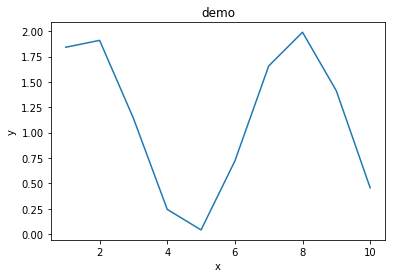

In [6]:
x = np.arange(1,11)
print(x)
y = np.sin(x)+1
print(y)
plt.title("demo") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y) 
plt.show()

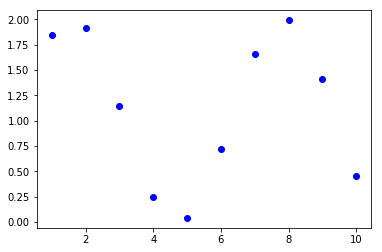

In [7]:
plt.plot(x,y,"ob")
plt.show()

In [ ]:
x = np.arange(0,2*np.pi,0.01)
y1 = cos(x)
y2 = sin(x)
plt.subplot(211)
plt.plot(x,y,'b')
plt.subplot(212)
plt.plot(x,)